In [1]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [4]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df["date_index"]=df["Date_month_year"]+" "+df["Time"]

In [6]:
# df["date_index"]

In [7]:
df["date_index"]=pd.to_datetime(df["date_index"])
df["Date_month_year"]=pd.to_datetime(df["Date_month_year"])

In [8]:
df["month"]=df['date_index'].dt.month_name()

In [9]:
df["month"].unique()

array(['April', 'August', 'July', 'May', 'December', 'June', 'January',
       'November', 'February', 'September', 'March', 'October'],
      dtype=object)

In [10]:
x=df.groupby("month").size().reset_index()

In [11]:
pd.DataFrame(x)

,month,0
0,April,375
1,August,67
2,December,65
3,February,59
4,January,55
5,July,49
6,June,1046
7,March,45
8,May,317
9,November,38


<BarContainer object of 12 artists>

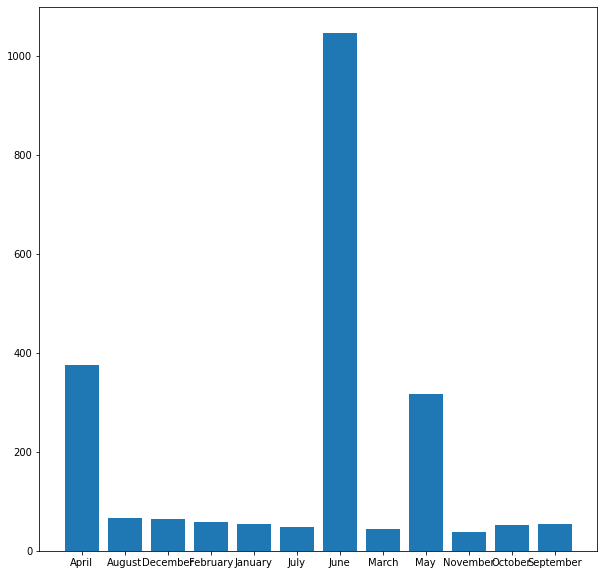

In [12]:
plt.figure(figsize=(10,10))
plt.bar(x["month"],x[0])

In [13]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,April
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,August


In [14]:
y=df.groupby("Date").size().reset_index()

In [15]:
y.head(1)

,Date,0
0,04-01-15,18


Text(0.5, 1.0, 'date wise complain chart')

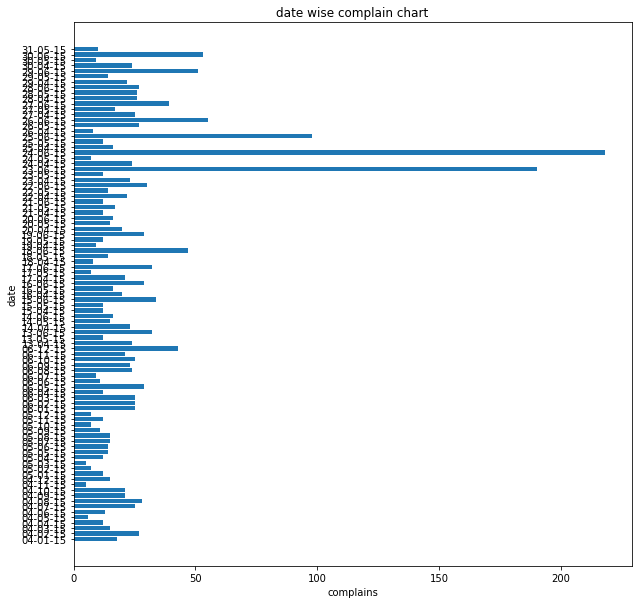

In [16]:
plt.figure(figsize=(10,10))
plt.barh(y["Date"],y[0])
plt.xlabel("complains")
plt.ylabel("date")
plt.title("date wise complain chart")

In [17]:
y.rename({0:"count"},axis=1,inplace=True)

<AxesSubplot:xlabel='Date'>

<Figure size 720x720 with 0 Axes>

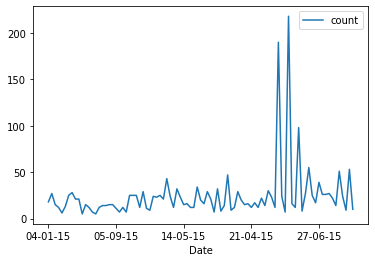

In [18]:
plt.figure(figsize=(10,10))
y.plot(x='Date',y="count",kind='line')

In [19]:
df['new_status']=['open' if st=="Open" or st=="Pending" else "closed"   for st in df['Status']]

In [20]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,month,new_status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,April,closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,August,closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,April,closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,July,open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,May,closed


In [21]:
z=df.groupby(["State"]).size().reset_index()

In [22]:
z.rename({0:"count"},axis=1,inplace=True)

In [23]:
z

,State,count
0,Alabama,26
1,Arizona,20
2,Arkansas,6
3,California,220
4,Colorado,80
5,Connecticut,12
6,Delaware,12
7,District Of Columbia,16
8,District of Columbia,1
9,Florida,240


<BarContainer object of 43 artists>

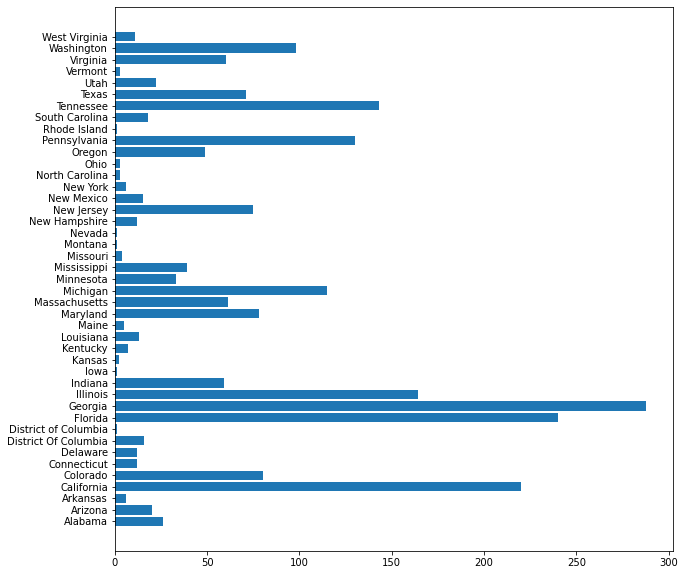

In [24]:
plt.figure(figsize=(10,10))
plt.barh(z["State"],z["count"])
# plt.xlabel("complains")
# plt.ylabel("date")
# plt.title("date wise complain chart")

In [25]:
complain=pd.DataFrame(z).sort_values("count",ascending=False)

In [26]:
complain[:5]

,State,count
10,Georgia,288
9,Florida,240
3,California,220
11,Illinois,164
36,Tennessee,143


In [27]:
v=df.groupby(["State","new_status"]).size().unstack().fillna(0)

In [28]:
v

new_status,closed,open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:ylabel='State'>

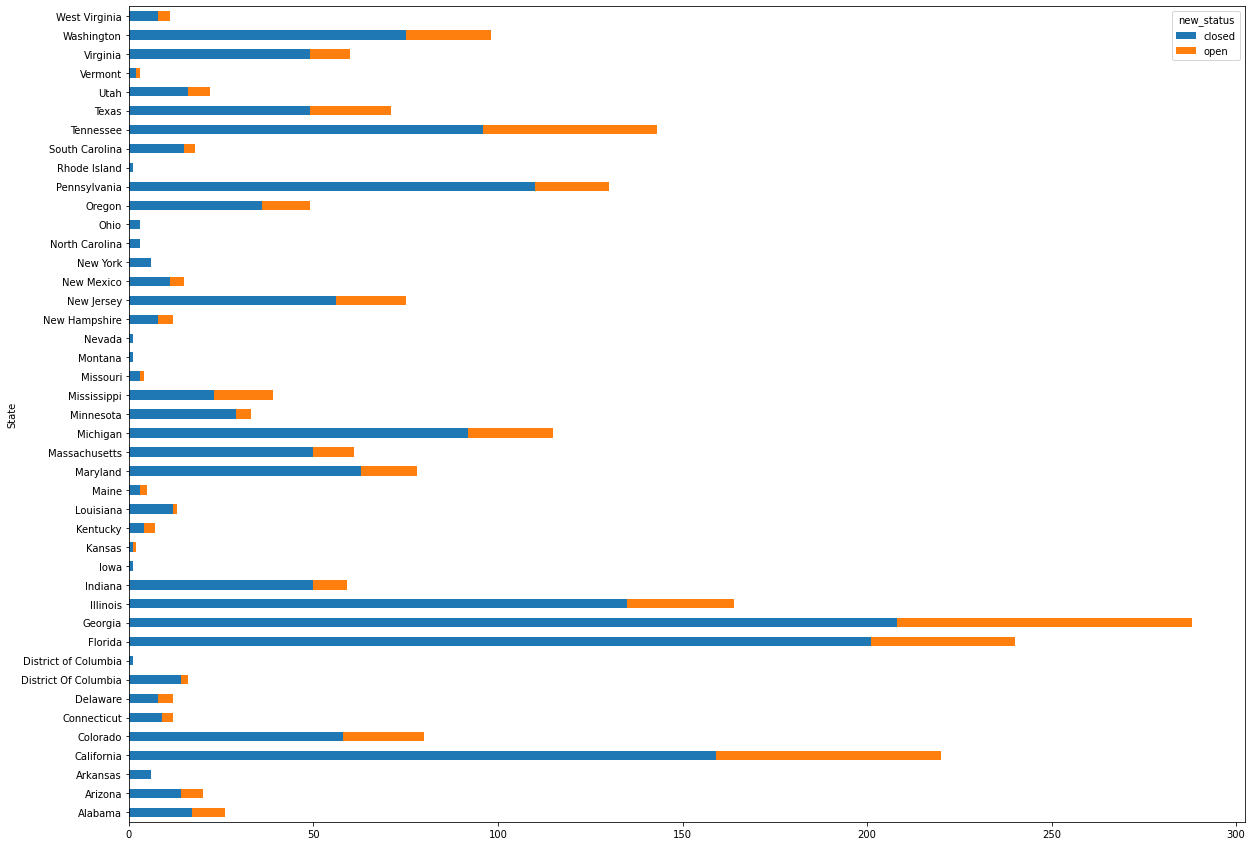

In [29]:
v.plot(kind='barh',figsize=(20,15),stacked=True)

In [30]:
v["unresolved"]=v["open"]/v["open"].sum()*100

In [31]:
v

new_status,closed,open,unresolved
State,,,
Alabama,17.0,9.0,1.740812
Arizona,14.0,6.0,1.160542
Arkansas,6.0,0.0,0.000000
California,159.0,61.0,11.798839
Colorado,58.0,22.0,4.255319
Connecticut,9.0,3.0,0.580271
Delaware,8.0,4.0,0.773694
District Of Columbia,14.0,2.0,0.386847
District of Columbia,1.0,0.0,0.000000


In [32]:
w=pd.DataFrame(v["unresolved"]).sort_values("unresolved",ascending=False)

<AxesSubplot:ylabel='State'>

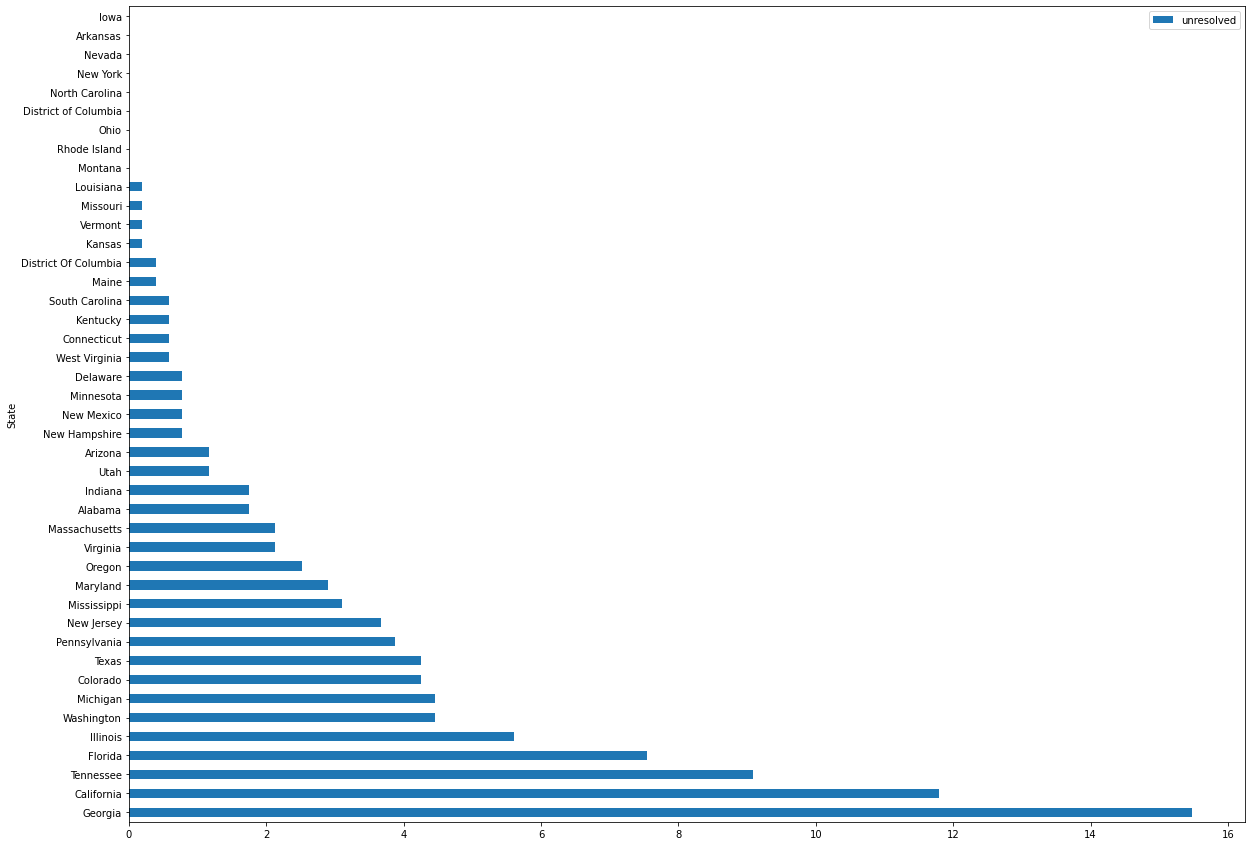

In [33]:
w.plot(kind="barh",figsize=(20,15))

In [34]:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [35]:
txt = df["Customer Complaint"].unique()

In [36]:
WC= WordCloud(width=200, height=100, background_color="black", stopwords=STOPWORDS).generate(str(txt))

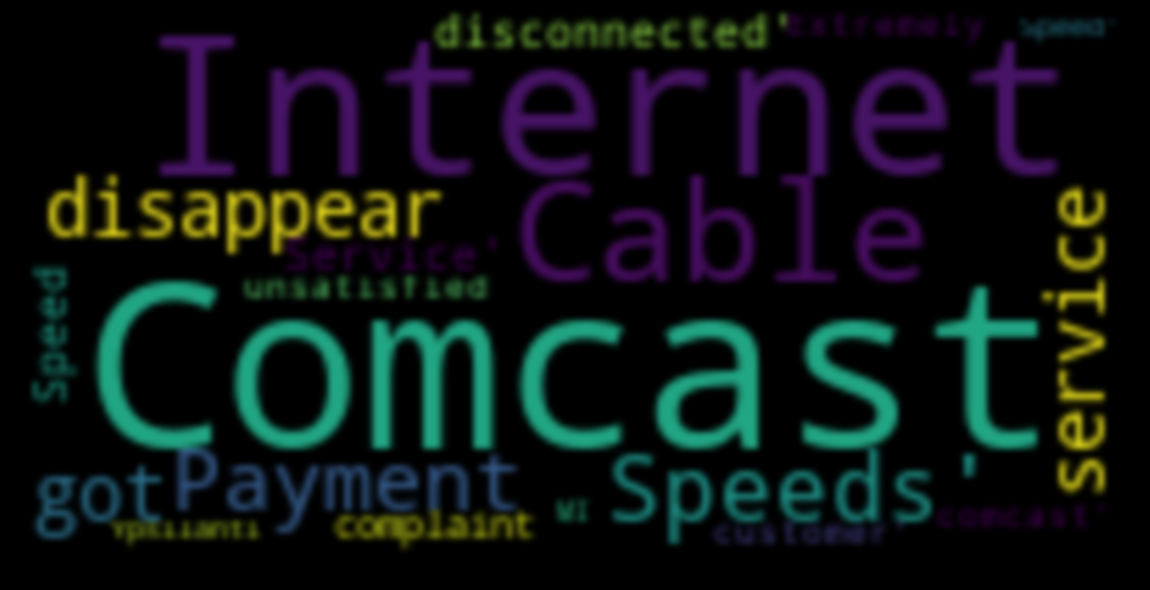

In [37]:
fig=plt.figure(figsize=(20,20), facecolor='k', edgecolor='w')
plt.imshow(WC,interpolation='bicubic')

In [38]:
!pip install GENSIM

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [39]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


In [40]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [41]:
stop=set(stopwords.words('english'))
exclude=set(string.punctuation)
lemma=WordNetLemmatizer()

In [42]:
def clean(doc):
    stop_free=" ".join([i for i in doc.lower().split() if i not in stop])
    punc_free="".join([ch for ch in stop_free if ch not in exclude])
    normalised=" ".join(lemma.lemmatize(word) for word in  punc_free.split())
    return normalised

In [43]:
# df.head(2)

In [44]:
doc_complete=df["Customer Complaint"].tolist()

In [45]:
# df["Customer Complaint"].tolist()

In [46]:
doc_clean=[clean(doc).split() for doc in doc_complete]


In [47]:
import gensim
from gensim import corpora

In [48]:
dictionary=corpora.Dictionary(doc_clean)
print(dictionary)

Dictionary(1412 unique tokens: ['cable', 'comcast', 'internet', 'speed', 'disappear']...)


In [49]:
doc_term_freq=[dictionary.doc2bow(doc) for doc in doc_clean]
# doc_term_freq

In [50]:
from gensim.models import LdaModel

In [51]:
NUM_TOPICS=10
ldamodel=LdaModel(doc_term_freq,num_topics=NUM_TOPICS, id2word=dictionary,passes=30)

In [52]:
topics=ldamodel.show_topics()

In [53]:
for topic in topics:
    print(topic)
    print()

(0, '0.287*"comcast" + 0.056*"complaint" + 0.043*"bill" + 0.022*"monthly" + 0.021*"refund" + 0.019*"issue" + 0.018*"show" + 0.015*"modem" + 0.014*"monopoly" + 0.014*"appointment"')

(1, '0.091*"service" + 0.083*"internet" + 0.080*"slow" + 0.043*"day" + 0.034*"month" + 0.029*"access" + 0.026*"back" + 0.019*"signal" + 0.018*"call" + 0.017*"shitty"')

(2, '0.104*"comcast" + 0.083*"charge" + 0.066*"internet" + 0.029*"connection" + 0.018*"help" + 0.017*"connectivity" + 0.017*"account" + 0.017*"terrible" + 0.016*"problem" + 0.015*"cramming"')

(3, '0.142*"internet" + 0.116*"speed" + 0.107*"comcast" + 0.042*"throttling" + 0.033*"xfinity" + 0.023*"fee" + 0.022*"high" + 0.020*"paying" + 0.016*"lack" + 0.014*"bill"')

(4, '0.084*"comcast" + 0.051*"contract" + 0.051*"service" + 0.037*"without" + 0.026*"charged" + 0.024*"price" + 0.022*"comcastxfinity" + 0.021*"billed" + 0.020*"phone" + 0.018*"year"')

(5, '0.057*"comcast" + 0.046*"switch" + 0.041*"charging" + 0.031*"bait" + 0.029*"low" + 0.027*"a

In [54]:
word_dict={}
for i in range(NUM_TOPICS):
    word=ldamodel.show_topic(i,topn=20)
    word_dict["Topic # "+"{}".format(i)]=[i[0] for i in word]

In [55]:
# ldamodel.show_topic(1,topn=20)

In [56]:
pd.DataFrame(word_dict)

,Topic # 0,Topic # 1,Topic # 2,Topic # 3,Topic # 4,Topic # 5,Topic # 6,Topic # 7,Topic # 8,Topic # 9
0,comcast,service,comcast,internet,comcast,comcast,service,data,billing,cable
1,complaint,internet,charge,speed,contract,switch,comcast,cap,comcast,internet
2,bill,slow,internet,comcast,service,charging,internet,comcast,issue,speed
3,monthly,day,connection,throttling,without,bait,customer,usage,practice,price
4,refund,month,help,xfinity,charged,low,poor,equipment,unfair,outage
5,issue,access,connectivity,fee,price,availability,xfinity,internet,complaint,broadband
6,show,back,account,high,comcastxfinity,get,failure,limit,pricing,throttled
7,modem,signal,terrible,paying,billed,bundle,bad,home,internet,300gb
8,monopoly,call,problem,lack,phone,consumer,horrible,xfinity,deceptive,term
9,appointment,shitty,cramming,bill,year,much,credit,email,false,isp


In [57]:
# import pyLDAvis.gensim


In [1]:
# Lda_display=pyLDAvis.gensim.prepare(ldamodel,doc_term_freq,dictionary,sort_topics=False)
# pyLDAvis.display(Lda_display)